### Nama : Ahmad Danial
### Npm : 11120245
### Kelas : 3KA18

**Introduction**

**Background** <br>
Seiring berkembangnya zaman, perusahaan harus mampu mengoptimalkan metode iklan mereka di platform digital untuk menarik calon pelanggan potensial dengan biaya yang minimal. Hal ini dilakukan dengan tujuan meningkatkan konversi, yaitu jumlah pelanggan potensial yang melakukan pembelian setelah mengklik iklan. Namun, untuk mencapai tujuan ini, perusahaan harus dapat melakukan prediksi click-through yang akurat. Click-through rate yang akurat sangat penting dalam menentukan keberhasilan kampanye iklan digital. Tanpa prediksi yang akurat, perusahaan mungkin akan mengeluarkan biaya yang besar tanpa hasil yang signifikan.

**Goals** <br>
Membuat machine learning model yang dapat mendeteksi potential user untuk convert atau tertarik pada sebuah iklan, sehingga perusahaan bisa mengoptimalkan cost dalam beriklan.

**Objective**
- Memprediksi user yang memiliki potensi untuk klik iklan atau tidak dengan akurasi 90%
- Mendapatkan insight mengenai pola potensial user yang klik iklan
- Memberikan rekomendasi bisnis berdasarkan hasil analisis dan model

**Business Metric**
Click-through rate <br>
<br>

### **Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/advertising.csv')

### **Exploratory Data Analysis**

Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya termasuk missing value dan duplikat.

In [ ]:
df.shape

(1000, 10)

In [ ]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Daily Time Spent on Site,float64,0,0.0,900,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
1,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
2,Area Income,float64,0,0.0,1000,"[61833.9, 68441.85, 59785.94, 54806.18, 73889...."
3,Daily Internet Usage,float64,0,0.0,966,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
4,Ad Topic Line,object,0,0.0,1000,"[Cloned 5thgeneration orchestration, Monitored..."
5,City,object,0,0.0,969,"[Wrightburgh, West Jodi, Davidton, West Terrif..."
6,Male,int64,0,0.0,2,"[0, 1]"
7,Country,object,0,0.0,237,"[Tunisia, Nauru, San Marino, Italy, Iceland, N..."
8,Timestamp,object,0,0.0,1000,"[2016-03-27 00:53:11, 2016-04-04 01:39:02, 201..."
9,Clicked on Ad,int64,0,0.0,2,"[0, 1]"


In [ ]:
df.duplicated().sum()

0

In [ ]:
# numerikal fitur
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

In [ ]:
# kategorikal fitur
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Ad Topic Line', 'City', 'Country', 'Timestamp']

Key Takeaways:
- Dilihat dari nilai mean dan median yang tidak begitu jauh nilainya, distribusi data cenderung mendekati normal
- Mayoritas user menghabiskan **waktu di suatu situs** adalah **68 menit (1 jam)**
- Mayoritas **pemakaian internet harian** user adalah **183 menit (3 jam)**
- Mayoritas **pendapatan** user **Rp399.068.320/tahun**
- Rentang usia user 19 – 61 tahun, dengan mayoritas **35 tahun**

In [ ]:
df[cats].describe().T

,count,unique,top,freq
Ad Topic Line,1000,1000,Cloned 5thgeneration orchestration,1
City,1000,969,Lisamouth,3
Country,1000,237,France,9
Timestamp,1000,1000,2016-03-27 00:53:11,1


Key Takeaways:
- Fitur target atau `Clicked on Ad` memiliki jumlah value **Yes** dan **No** yang **seimbang**
- Akurasi cocok digunakan untuk data yang seimbang. Akurasi menggambarkan seberapa sering model membuat prediksi yang benar

### Univariate Analysis

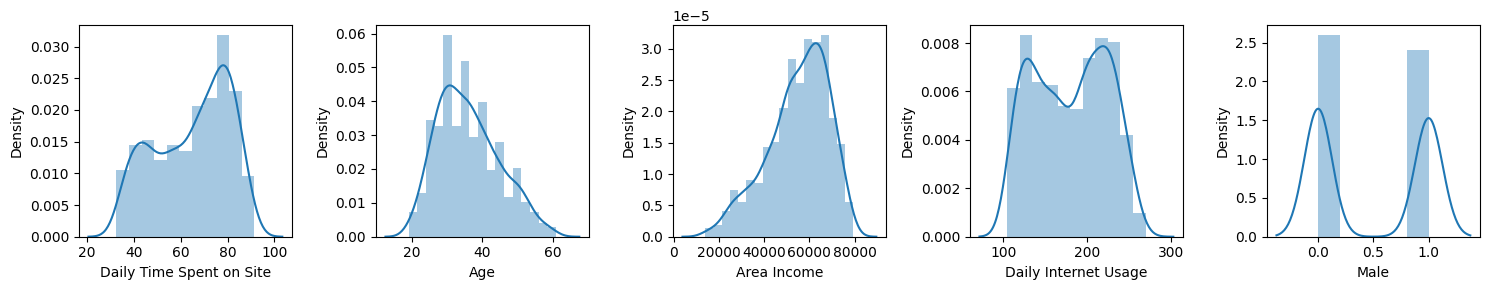

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(0, min(len(nums), 5)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

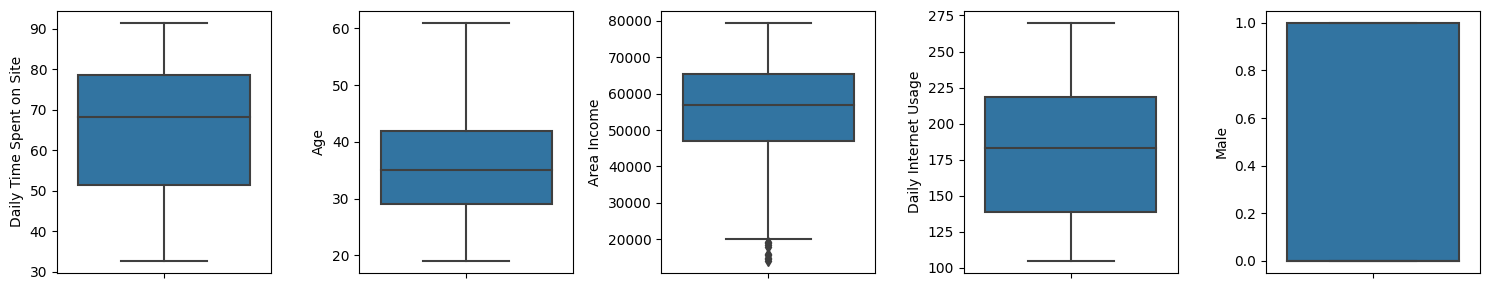

In [ ]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 3))
for i in range(0, min(len(nums), 5)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

Key Takeaways:
- Fitur `Area Income` memiliki outlier, namun masih dapat ditoleransi karena bukan nilai yang ekstrim

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Ad Topic Line:
--------------------------------------------------
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

Value count kolom City:
--------------------------------------------------
Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 96

### Bivariate Analysis

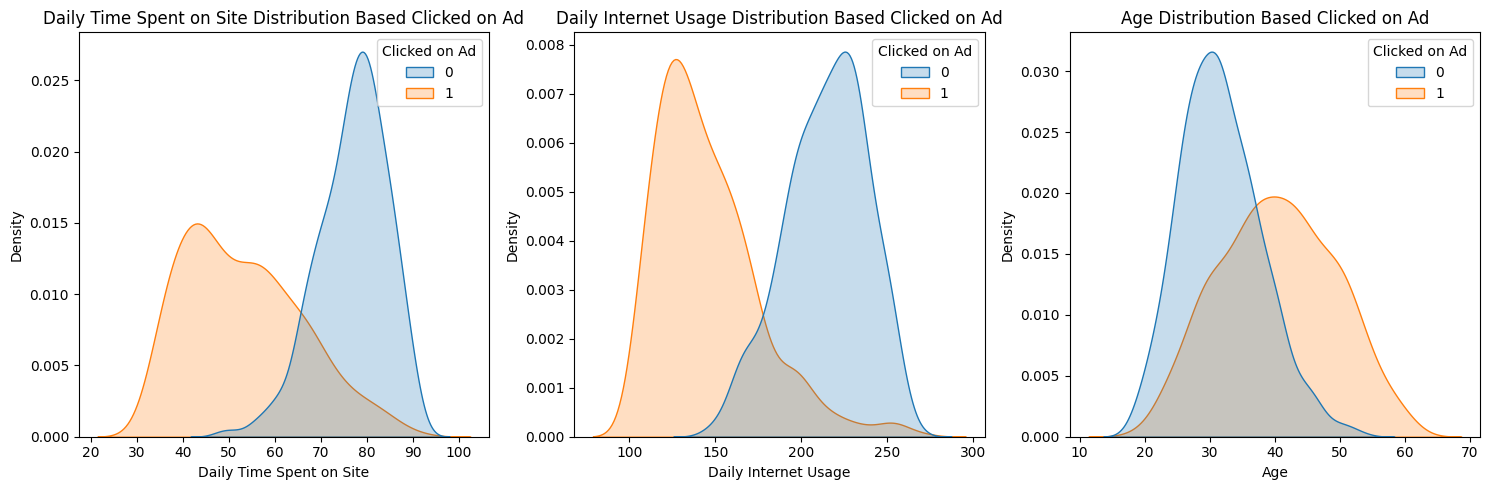

In [ ]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

#### *Numerical Feature and Click on Ads*

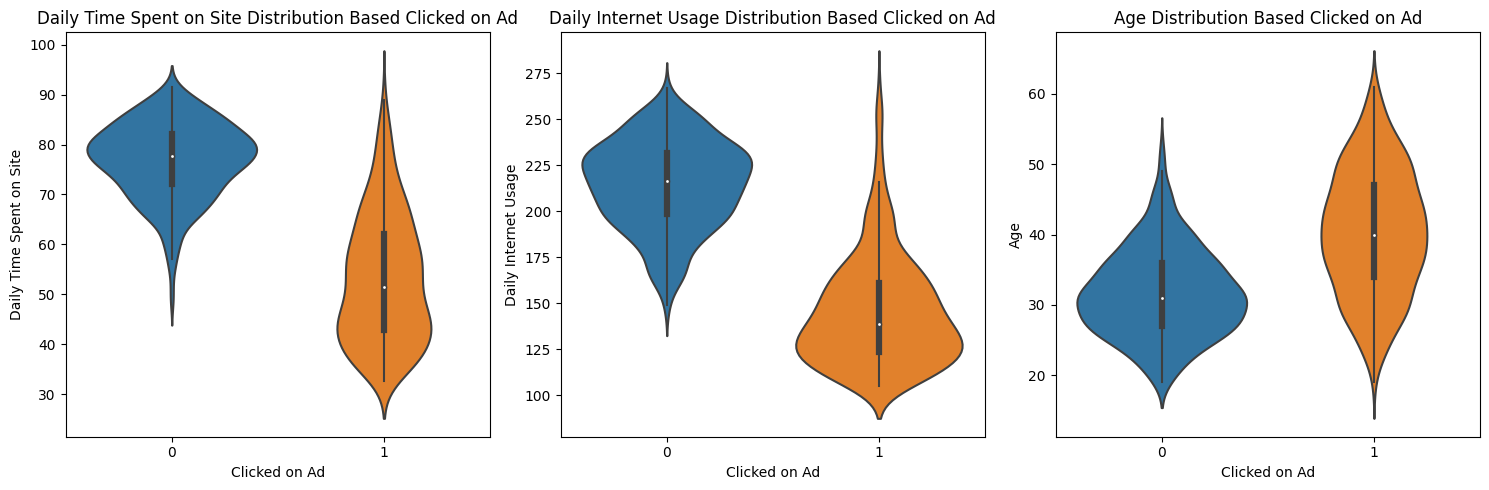

In [ ]:
# distribusi menggunakan violinplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

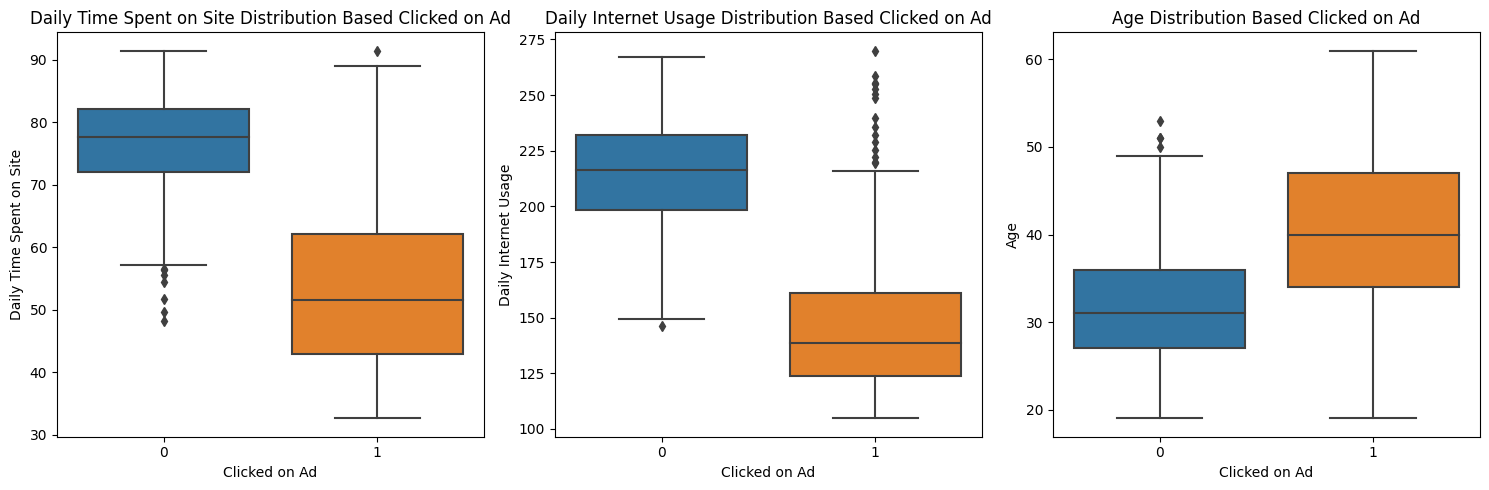

In [ ]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'], orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

Key Takeways:
- **Daily Time Spent**
    - **User yang jarang menghabiskan waktu di sebuah situs (kurang dari 1 jam) memiliki potensi untuk mengklik iklan yang lebih besar**
- **Daily Internet Usage**
    - **User yang jarang menggunakan internet memiliki potensi untuk mengklik iklan yang lebih besar dibandingkan user yang sering menggunakan internet**. User internet yang jarang menggunakan internet mungkin memiliki rasa ingin tahu yang lebih besar tentang produk atau layanan yang ditawarkan melalui iklan. Karena mereka kurang terbiasa dengan internet, mereka mungkin merasa tertarik dengan iklan dan ingin mengetahui lebih banyak tentang produk. Kemungkinan lainnya adalah karena keterbatasan akses internet pada informasi yang ditawarkan, ketika user menemukan iklan yang menarik, mereka lebih mungkin untuk mengklik iklan tersebut untuk mendapatkan informasi yang lebih lengkap.
- **Age**
    - **User yang lebih tua memiliki potensi mengklik iklan yang lebih besar**. Kumungkinan pengguna internet yang lebih muda lebih terbiasa dengan teknologi dan internet, sehingga mereka mungkin lebih mampu menemukan informasi yang mereka butuhkan melalui sumber lain selain iklan. Mereka mungkin juga lebih kritis dalam menilai iklan, dan lebih memilih untuk menghindari iklan yang terlalu mengganggu atau tidak relevan.

#### *Categorical Feature and Click on Ads*

In [ ]:
# def ratio_with_target(feats):
#     ratio_df = df.groupby([feats,'Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
#     ratio_df.columns = [feats,'Clicked on Ad','total']
#     ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.total/x.total.sum() *100, 0)).values.astype(int)
#     ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
#     ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
#     return ratio_df

# def ratio_with_target(feats):
#     ratio_df = df.groupby([feats, 'Clicked on Ad']).size().reset_index(name='total')
#     ratio_df['ratio'] = ratio_df.groupby(feats)['total'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
#     ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
#     ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
#     return ratio_df
def ratio_with_target(feats):
    ratio_df = df.groupby([feats, 'Clicked on Ad']).size().reset_index(name='total')
    ratio_df['ratio'] = ratio_df.groupby(feats)['total'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
    ratio_df = ratio_df.sort_values(by=[1], ascending=True)  # Change 'Yes' to 1
    return ratio_df


#---------------------------------------------------------------------------------------------------------

# visualisasi
def cat_visualization(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,7))

    # count
    ax[0].set_title(f'Clicked on Ad Distribution by {judul}\n', fontsize=14)
    sns.countplot(y=fitur, data = df, hue = 'Clicked on Ad', ax=ax[0], palette = ['#1f77b4', '#ff7f0e'],
                 order = df[fitur].value_counts().index)
    ax[0].bar_label(ax[0].containers[0], fontsize=11)
    ax[0].bar_label(ax[0].containers[1], fontsize=11)
    # ax[0].set_yticks([])
    # ax[0].tick_params(axis='x', rotation=90)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')


    #percentage
    ax[1].set_title(f'Pecentage of Clicked on Ad by {judul}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, ax=ax[1], color = ['#1f77b4', '#ff7f0e'])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2),
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

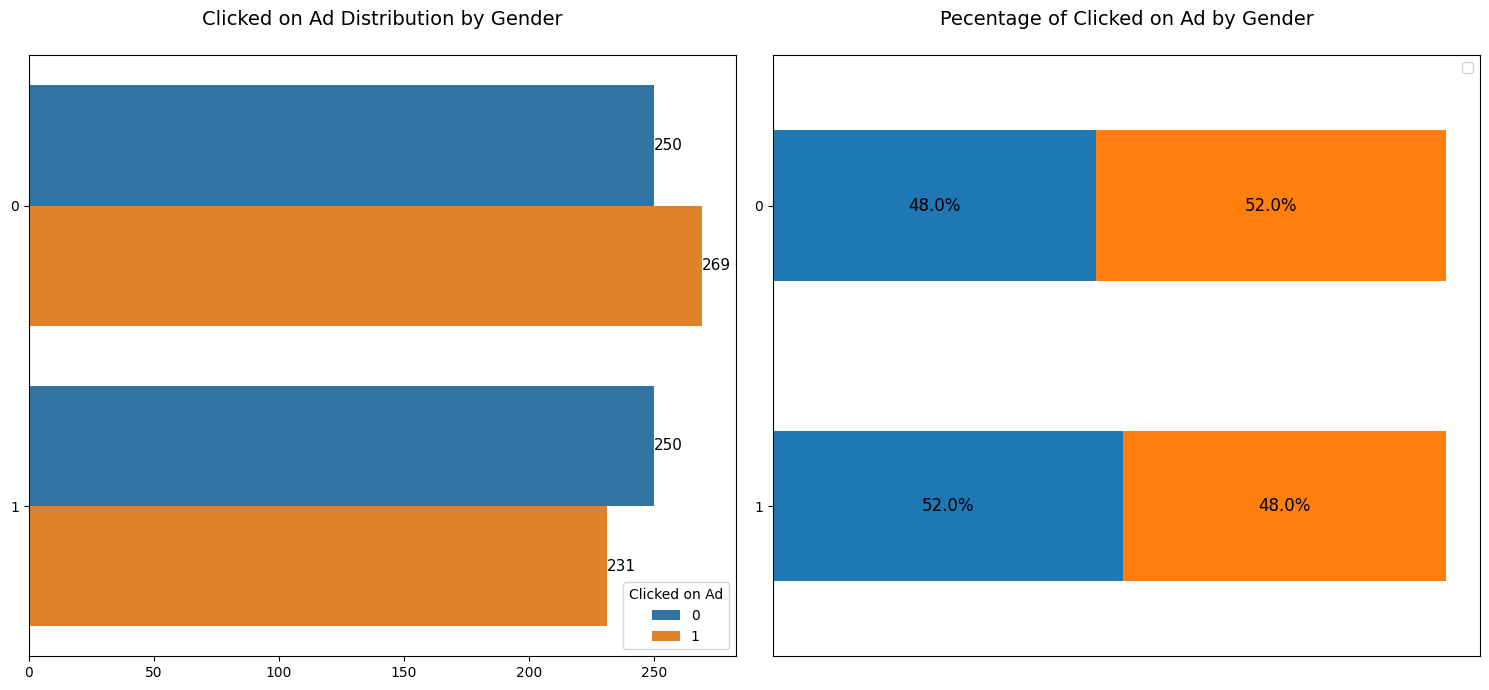

In [ ]:
cat_visualization('Male', 'Gender')

Key Takeaways:
- Secara keseluruhan perbedaan gender pada potensi klik iklan tidak terlalu signifikan

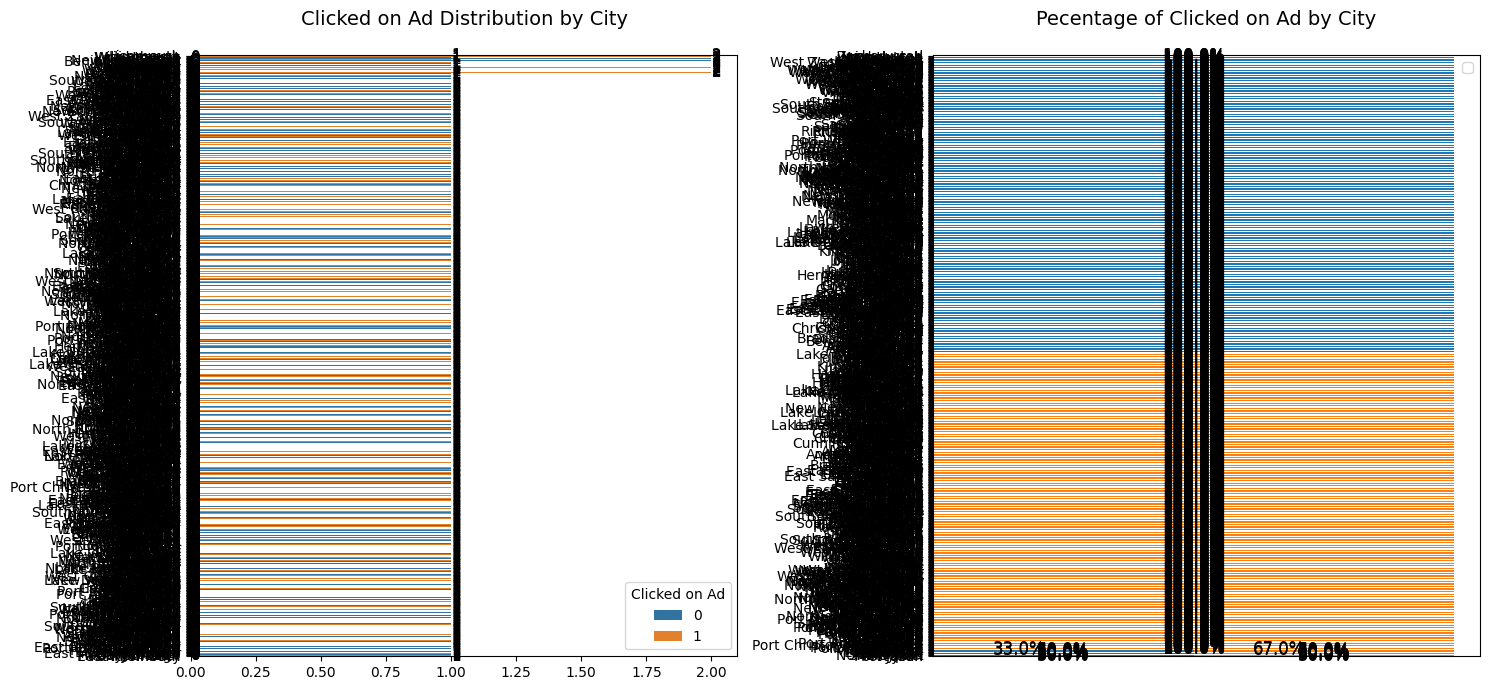

In [ ]:
cat_visualization('City', 'City')

Key Takeaways:
- Mayoritas user berasal dari Pulau Jawa
- Kalimantan Selatan dan Sumatra Barat memiliki jumlah user yang sedikit namun memiliki potensi klik iklan yang lebih besar

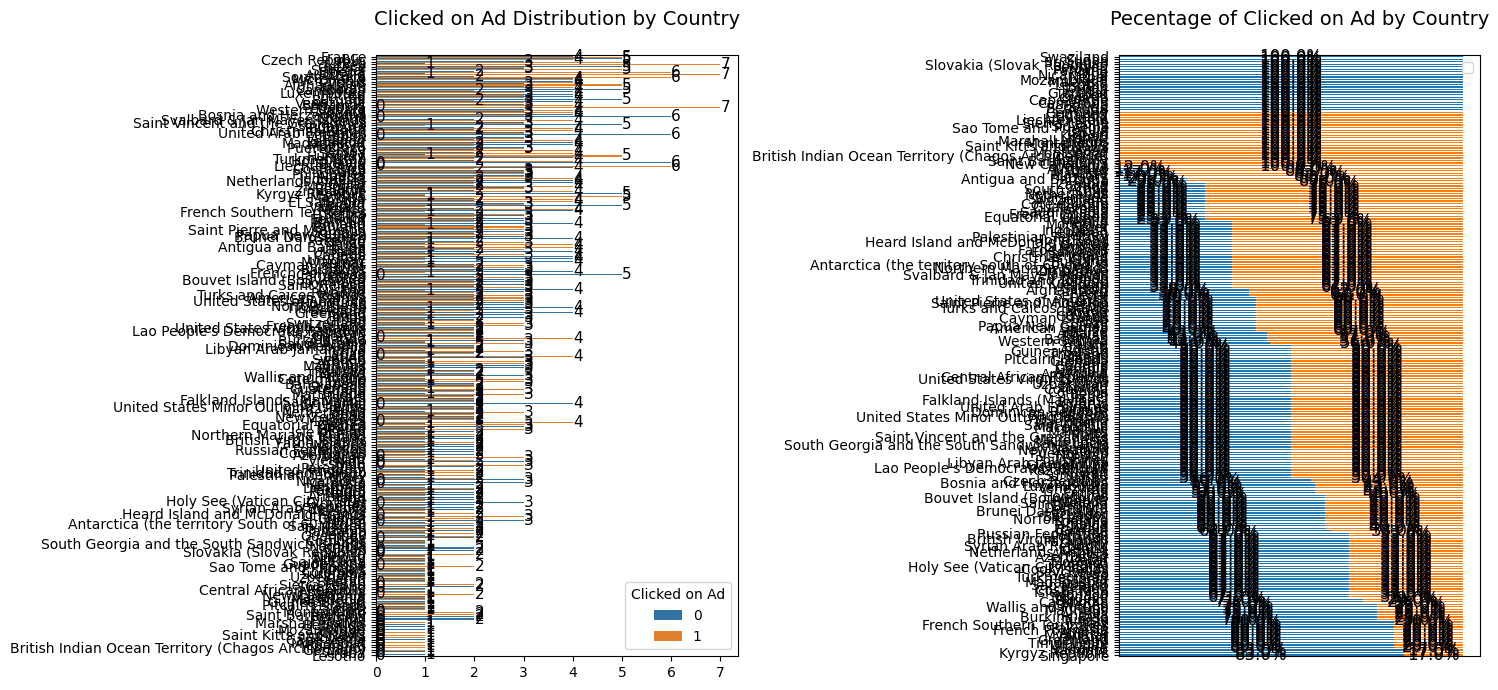

In [ ]:
cat_visualization('Country', 'Country')

Key Takeaways:
- Potensi jenis kategori produk iklan terhadap klik user tidak terlalu berbeda signifikan.
- Kategori dengan potensi klik tertinggi adalah Finance, Fashion, dan Otomotif

#### *Sessions and Click on Ads*

Menganalisis waktu potensial bagi user yang mengklik iklan penting karena dapat memberikan wawasan yang berharga tentang perilaku pengguna dan membantu perusahaan mengoptimalkan strategi pemasaran mereka.

In [ ]:
df1 = df.copy()

In [ ]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Month'] = df1['Timestamp'].dt.month
df1['Week_day'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour
df1 = df1.drop(['Timestamp'], axis=1)

ValueError: ignored

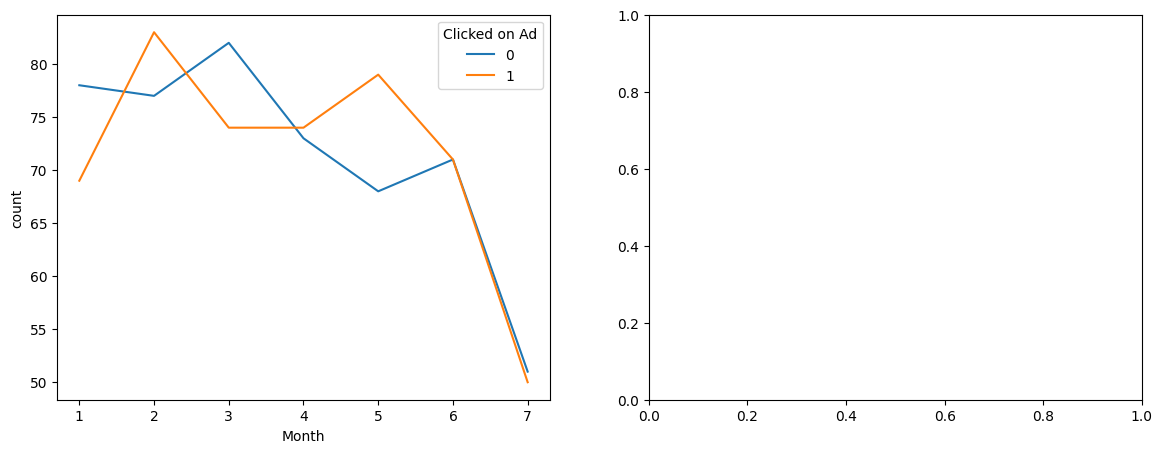

In [ ]:
clicked_per_month = df1.groupby(['Month', 'Clicked on Ad'])[['Male']].count()
clicked_per_month.rename(columns={'Male': 'count'}, inplace=True)
clicked_per_month.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Month', y='count', hue='Clicked on Ad', data=clicked_per_month, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Month', color='#ff7f0e', ax = ax[1])


Key Takeaways:
- Banyak user yang mengklik iklan di bulan Februari dan Mei

ValueError: ignored

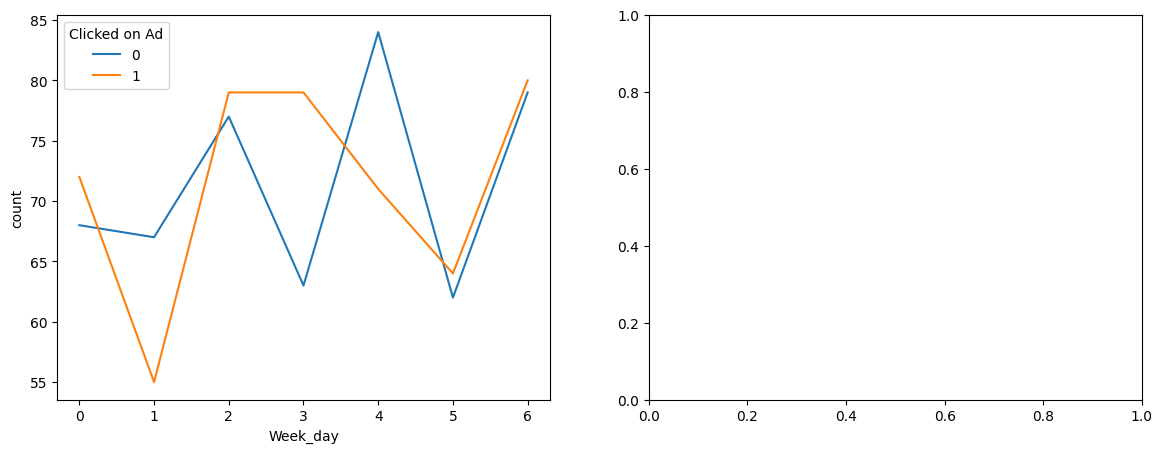

In [ ]:
clicked_per_wkday = df1.groupby(['Week_day', 'Clicked on Ad'])[['Male']].count()
clicked_per_wkday.rename(columns={'Male': 'count'}, inplace=True)
clicked_per_wkday.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Week_day', y='count', hue='Clicked on Ad', data=clicked_per_wkday, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Week_day', color='#ff7f0e', ax = ax[1])

Key Takeaways:
- Sedikit sekali user yang mengklik iklan di hari Senin dan Jumat
- Hari Rabu memiliki konversi klik iklan yang paling baik, jumlah user yang mengklik user tinggi dan yang tidak mengklik rendah
- Hari Senin dan Jumat sering kali dianggap sebagai awal dan akhir minggu kerja, di mana orang cenderung sibuk dengan pekerjaan dan kurang fokus pada aktivitas online seperti mengklik iklan. Sebaliknya, hari Rabu mungkin merupakan titik tengah minggu di mana orang merasa lebih rileks dan memiliki lebih banyak waktu untuk menghabiskan waktu online dan berbelanja.

ValueError: ignored

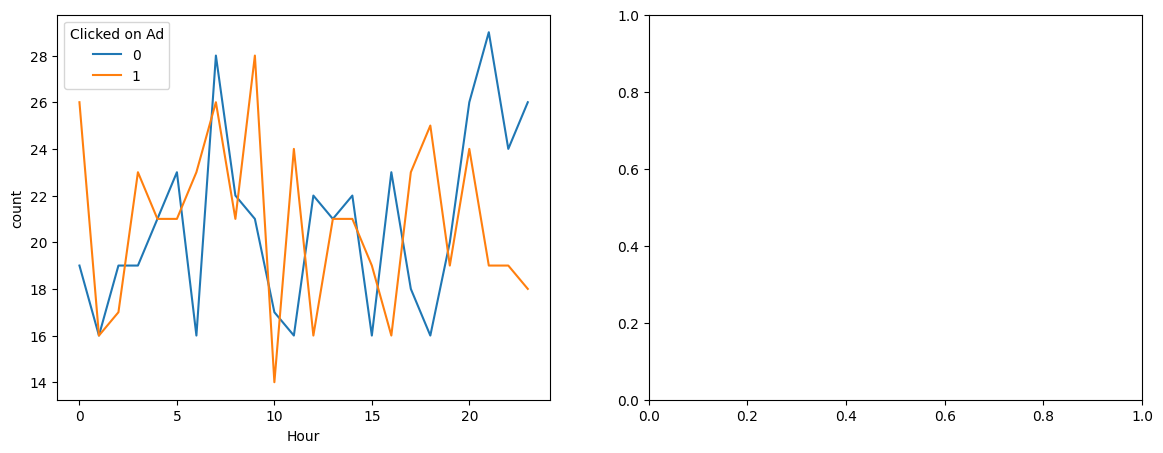

In [ ]:
clicked_per_hr = df1.groupby(['Hour', 'Clicked on Ad']).count()
clicked_per_hr.rename(columns={'Male': 'count'}, inplace=True)
clicked_per_hr.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Hour', y='count', hue='Clicked on Ad', data=clicked_per_hr, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Hour', color='#ff7f0e', ax = ax[1])

Key Takeaways:
- Potensi user mengklik iklan dan memiliki konversi pembelian tinggi di jam 00.00, 09.00, 11.00, dan 18.00
- Jam-jam yang disebutkan mungkin berhubungan dengan kebiasaan pengguna dalam menggunakan perangkat digital. Pada jam 00.00, orang mungkin tidak memiliki kewajiban atau tugas yang mendesak, sehingga lebih cenderung menghabiskan waktu online. Jam 09.00 dan 11.00 mungkin menjadi waktu ketika orang memiliki jeda dalam pekerjaan atau istirahat singkat, sementara jam 18.00 adalah waktu setelah pekerjaan selesai di mana mereka dapat fokus pada kegiatan pribadi.

### Multivariate Analysis
---

**Pairplot 'Daily Time Spent on Site', 'Age', 'Daily Internet Usage'**

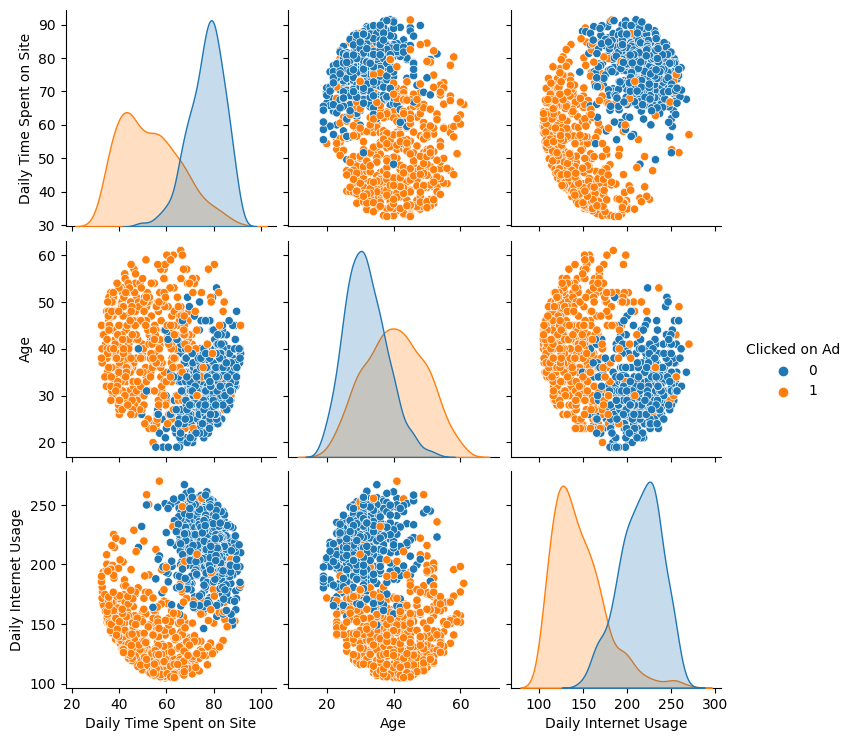

In [ ]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']
sns.pairplot(data=df1, vars=feats, hue='Clicked on Ad')

Key Takeaways:
- Dari visualisasi pairplot distribusi user menjadi dua segmen
- Dari Daily Internet Usage dengan Daily Time Spent on Site user dapat dikategorikan menjadi aktif nan non-aktif
- Aktif user cenderung tidak terlalu suka mengklik iklan, sehingga perusahaan dapat mentargetkan iklannya kepada non-aktif user

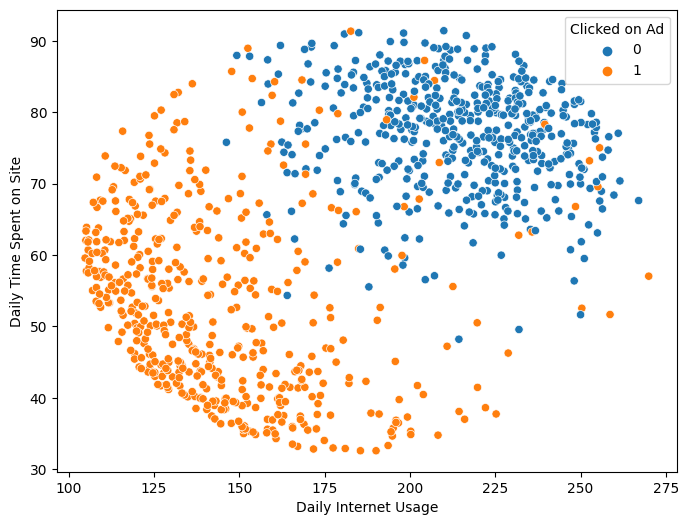

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])

plt.show()

**Heatmap** <br>
Mengetahui korelasi fitur-fitur terhadap target.

Sebelumnya dikarenakan fitur target masih data kategorikal maka dilakukan konversi kedalam nilai binary/boolean.

In [ ]:
df1['Clicked on Ad'] = df1['Clicked on Ad'].map({'Yes':1, 'No':0})

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

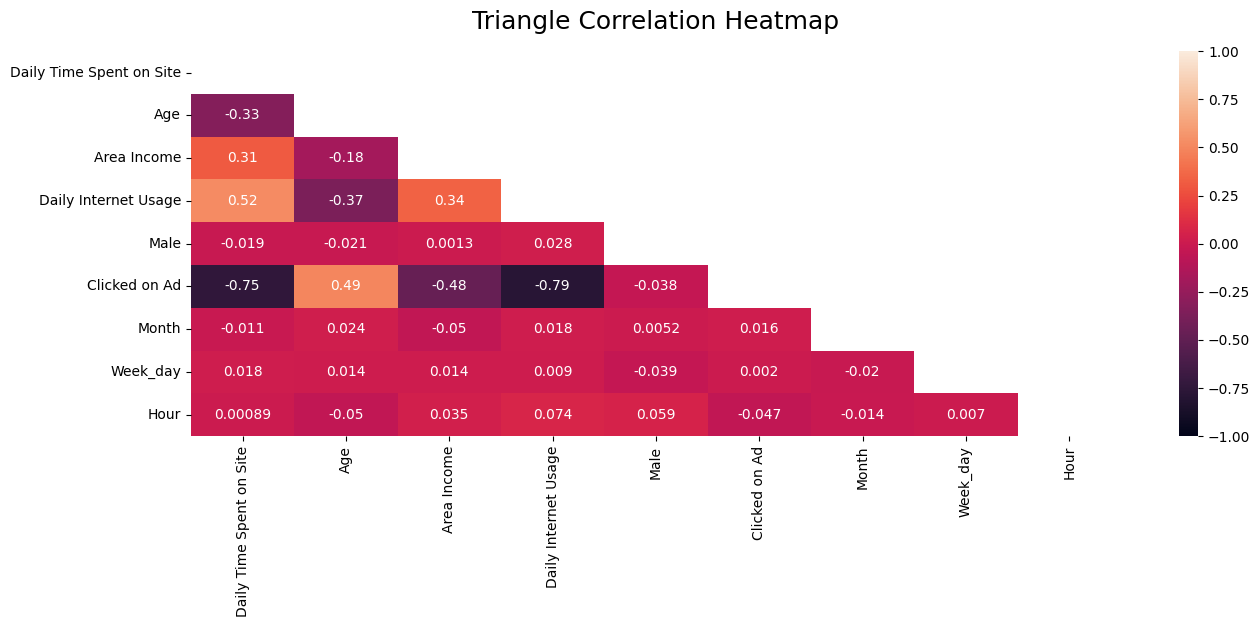

In [ ]:
plt.figure(figsize=(15, 5))

mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Key Takeaways:
- Tidak ditemukan multikoreanilitas atau fitur yang redundan.
- Terlihat bahwa fitur target atau Clicked on Ad memiliki korelasi yang kuat dengan Dayly Time Spent on Site, Age, Area Income, dan Daily Internet Usage.
- Pemakaian internet harian dan waktu yang dihabiskan memiliki korelasi yang positif yang kuat. Semakin besar pemakaian internet, semakin besar pula waktu yang dihabiskan user.
- Semakin besar income pengguna juga semakin besar pemakaian internet hariannya.

### **DATA PREPROCESSING**

Data Cleaning

**Handling Missing Value** <br>
- Pada fitur numerikal missing value diisi dengan median, karena lebih robust
- Pada fitur kategorikal missing value diisi dengan modus

In [ ]:
df_cleaned = df1

In [ ]:
#Handling Missing Value
df_cleaned.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Clicked on Ad               0
Month                       0
Week_day                    0
Hour                        0
dtype: int64

In [ ]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [ ]:
df_cleaned['Male'].fillna(df_cleaned['Male'].mode()[0], inplace = True)

In [ ]:
df_cleaned.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Clicked on Ad               0
Month                       0
Week_day                    0
Hour                        0
dtype: int64

### Feature Encoding

- Label Encoding : `Male`
- One Hot Encoding : `Pulau`, `category`

In [ ]:
df_prep = df_cleaned

In [ ]:
df_prep.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Week_day,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,4,3


In [ ]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Month                     1000 non-null   int64  
 10  Week_day                  1000 non-null   int64  
 11  Hour                      1000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 93.9+ KB


Fitur city dan province memiliki nilai banyak nilai unik. Sehingga diputuskan untuk membuat fitur baru yaitu pengkategorian menurut pulau untuk diterapkan pada model

In [ ]:
df_prep['province'].unique()

In [ ]:
df_prep['Pulau'] = np.where((((df_prep['province']) == 'Daerah Khusus Ibukota Jakarta')
                             | ((df_prep['province']) == 'Jawa Timur')
                             | ((df_prep['province']) =='Jawa Barat')
                             | ((df_prep['province']) =='Banten')
                             | ((df_prep['province']) =='Jawa Tengah')), 'Jawa',
                            np.where(((df_prep['province']) == 'Kepulauan Riau')
                                     | ((df_prep['province']) == 'Sumatra Utara')
                                     | ((df_prep['province']) == 'Lampung')
                                     | ((df_prep['province']) == 'Sumatra Barat')
                                     | ((df_prep['province']) == 'Sumatra Selatan'), 'Sumatra',
                                     np.where(((df_prep['province']) == 'Kalimantan Barat')
                                              | ((df_prep['province']) == 'Kalimantan Selatan')
                                              | ((df_prep['province']) == 'Kalimantan Timur')
                                              | ((df_prep['province']) == 'Kalimantan'), 'Kalimantan',
                                              np.where(((df_prep['province']) == 'Bali'), 'Bali',
                                              'Sulawesi'))))

In [ ]:
df_prep['Pulau'].value_counts()

Lalu melakukan One Hot Encoding terhadap fitur `Pulau` dan `category`

In [ ]:
df_prep = pd.get_dummies(df_prep, columns=['Pulau'])

In [ ]:
df_prep = pd.get_dummies(df_prep, columns=['category'])

In [ ]:
df_prep.info()

### Feature Selection
---
Menghapus fitur yang tidak digunakan dalam model.

In [ ]:
df_prep.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Week_day,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,4,3
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,5,3,14
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,1,3,20
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,1,3,0,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,4,0,9
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,7,0,1


In [ ]:
df_prep.drop(columns = ['Ad Topic Line', 'City', 'Country'], inplace=True)

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Week_day                  1000 non-null   int64  
 8   Hour                      1000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


In [ ]:
df_prep.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Week_day,Hour
0,68.95,35,61833.90,256.09,0,0,3,6,0
1,80.23,31,68441.85,193.77,1,0,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,6,20
3,74.15,29,54806.18,245.89,1,0,1,6,2
4,68.37,35,73889.99,225.58,0,0,6,4,3
5,59.99,23,59761.56,226.74,1,0,5,3,14
6,88.91,33,53852.85,208.36,0,0,1,3,20
7,66.00,48,24593.33,131.76,1,1,3,0,1
8,74.53,30,68862.00,221.51,1,0,4,0,9
9,69.88,20,55642.32,183.82,1,0,7,0,1


### **MODELING**

Pada tahapan akan dilakukan pencarian dan pembangunan sebuah model dengan tingkat akurasi yang tinggi. Matriks akurasi digunakan karena  jumlah kategori pada target yang digunakan seimbang. Salain itu percobaan akan dilakukan dengan menggunakan data train default (Experiment 1) dan menggunakan standardization (Experiment 2).

### SPLIT TRAIN TEST

In [ ]:
df_model = df_prep.copy()

In [ ]:
# define X (fitur) and y (target)
X = df_model.drop(columns='Clicked on Ad').copy()
y = df_model['Clicked on Ad'].copy()

In [ ]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
print('Split 70:30')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Split 70:30
Total rows & column of train set: (700, 8)
Total rows & column of test set: (300, 8)


In [ ]:
y_train.value_counts()

0    354
1    346
Name: Clicked on Ad, dtype: int64

DEFINE FUNCTION

In [ ]:
#DEFINE FUNCTION
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


def experiment(X_train, X_test, y_train, y_test):
    models = [
      ('Logistic Regression', LogisticRegression(random_state=1)),
        ('Decision Tree', DecisionTreeClassifier(random_state=1)),
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        duration = (dt.now()-start).total_seconds()

        # evaluasi
        accuracy_test = accuracy_score(y_test, y_pred)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result.append((name, accuracy_test, accuracy_train, precision, recall, f1, duration))

    df_comparison = pd.DataFrame(result, columns=['Model', 'Accuracy_test','Accuracy_Train', 'Precision', 'Recall', 'F1', 'Duration'])
    return df_comparison

Machine Learning Model With Normalization/Standardization
---

In [ ]:
#standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
exp2 = experiment(X_train_scaled, X_test_scaled, y_train, y_test)
exp2_sorted = exp2.sort_values(by='Accuracy_test', ascending=False)

In [ ]:
exp2_sorted

,Model,Accuracy_test,Accuracy_Train,Precision,Recall,F1,Duration
0,Logistic Regression,0.96,0.972857,0.993056,0.928571,0.959732,0.007875
1,Decision Tree,0.93,1.000000,0.952381,0.909091,0.930233,0.004705


### Model Evaluation
---

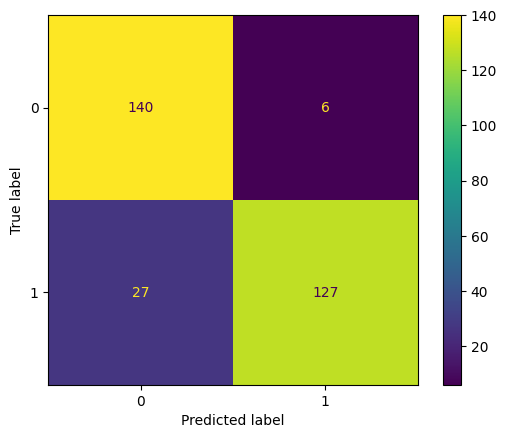

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = LogisticRegression(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

Key takeaways:
- Berdasarkan evaluasi algoritma Random Forest dari confussion matrix terlihat bahwa model sangat baik memprediksi user yang klik iklan atau tidak dengan nilai kesalahan prediksi yang kecil.
    - Terdapat 140 prediksi benar yang diklasifikasikan sebagai bukan klik iklan (True Negatives, TN).
    - Terdapat 1 prediksi salah yang diklasifikasikan sebagai klik iklan padahal sebenarnya bukan (False Positives, FP).
    - Terdapat 11 prediksi salah yang diklasifikasikan sebagai bukan klik iklan padahal sebenarnya adalah klik iklan (False Negatives, FN).
    - Terdapat 127 prediksi benar yang diklasifikasikan sebagai klik iklan (True Positives, TP).

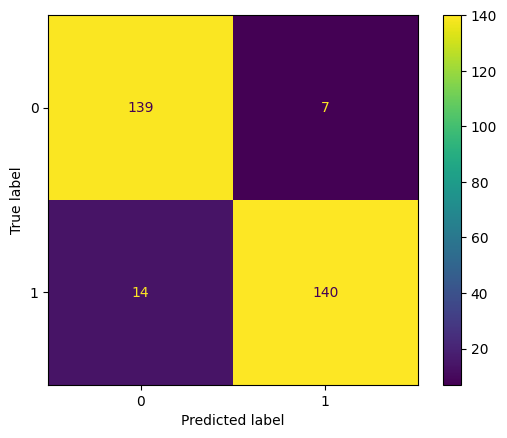

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = DecisionTreeClassifier(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

### Feature Importance with SHAP
---

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 13.7 MB/s eta 0:00:00


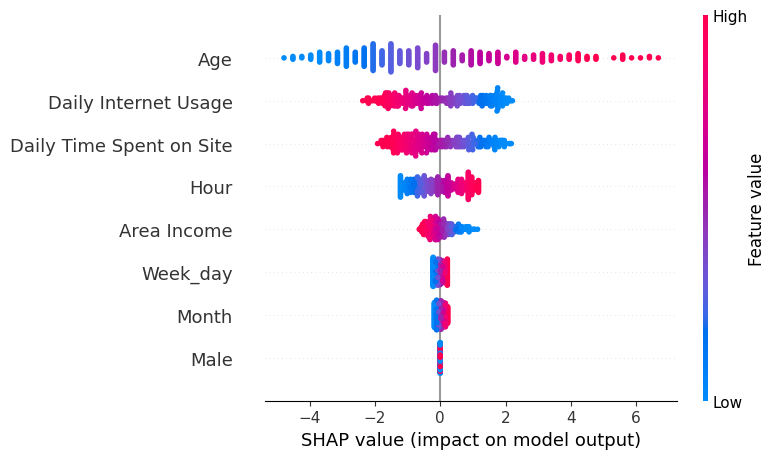

In [ ]:
# import shap

# explainer = shap.TreeExplainer(final_model)
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values[1], X_test)
import shap

explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Key takeaways:
- Dari plot SHAP dapat dilihat fitur yang mempengaruhi prediksi klik pada iklan diantaranya adalah `Daily Internet Usage`, `Daily Time Spent on Site`, `Area Income`, dan `Age`
- `Daily Internet Usage`, `Daily Time Spent on Site`, `Area Income` memiliki korelasi negatif terhadap klik iklan (warna merah disebelah kiri). Hal ini berarti user yang bersifat non-aktif user dalam penggunaan internet dan user yang memiliki pendapatan menengah kebawah memiliki potensi klik iklan yang lebih besar.
- Sedangkan fitur `Age` memiliki korelasi yang positif. Artinya semakin tua usia user maka akan berpotensi terdapat klik iklan.